## About Pens and Printers

Pens and Printers was founded in 1984 and provides high quality office products to large
organizations. We are a trusted provider of everything from pens and notebooks to desk
chairs and monitors. We don’t produce our own products but sell those made by other
companies.
We have built long lasting relationships with our customers and they trust us to provide them
with the best products for them. As the way in which consumers buy products is changing,
our sales tactics have to change too. Launching a new product line is expensive and we need
to make sure we are using the best techniques to sell the new product effectively. The best
approach may vary for each new product so we need to learn quickly what works and what
doesn’t.

## Data validation

- Week : int type, without missing values. No cleaning needed.
 
- sales_method : category type, 3 approches, without missing values. Type changed and incorrect values are replaced.
 
- customer_id : object type, without missing values and duplicates. No cleaning needed. 
 
- nb_sold : int type, without missing values. No cleaning needed.
 
- revenue : float type, 7% of data was missing, since it is skewed it is replaced by median. 

- years_as_customer : int type, without missing values. No cleaning needed.

- nb_site_visits : int type, without missing values. No cleaning needed.
 
- state : object type, 50 states, without missing values. No cleaning needed.

## How many customers were there for each approach?


Following the lunch of new line for the office stationary three different approaches have been used to promote sales; namely, calling the customers, sending emails and combination of both. 

As it is depicted in the figure below the number of customers contacted via email is significantly higher than other approaches, due to the fact that emailing is faster. 
On the second level are the count of customers contacted via call which is less than 5000. Finally, the customers who have been contacted via email and a follow up call a week later are about half of the number of the people who have been contacted by call. 
The exact numbers are presented in the tables below. 

|Sales Methods|Total number of Customers|
|:---:|:---:|
|Call|4962|
|Email|7466|
|Email + Call|2572|    


![Break down category](figure1.png)


## What does the spread of the revenue look like overall? And for each method?

As it is shown in the figure below the distribution of the data is not normal. We can see that there are two peaks one around 80 and the other around 50. Additionally, we can see that the revenues higher than 120 are not significant in term of the total number. 

In the next figure we can learn more and realize the reason for the figure not being normal. Please note that, 7% of the data was missing and they are replaced by median to avoid any bias.  



![Break down category](figure2.png)

In the graph of spread of the revenue we can clearly see that each approach resulted in different revenue. The customers who have been contacted by email and phone produced the revenue of approximately 150 to 180. This is much higher than customers who have been contacted solely by email, which is about 80 to 110. And the least revenue is generated from the customers who have been contacted by call with the median of 50.

Note worthy to mention that there are not lot of outliers except for the email approach which needs more precision in data collection. 


![Break down category](figure3.png)




## Was there any difference in revenue over time for each of the methods?

This graph shows that overall, the amount of revenue has increased during the time for all three methods. However, we can see that the increase in revenue is steeper for the approach of email and call together relative to the other approaches. This suggests that email and call approach may even generate more revenue in future, judging by comparing the trendlines.

![Break down category](figure4.png)


## Additional notes: effect of loyality

The study of revenue versus years as customers column, gives us two findings. First of all, it seems that the loyalty of majority of customers are less than ten years. Secondly for the rest of the group email and call had an adverse effect. However, more studies is required to confirm this finding. 

![Break down category](figure5.png)


## Based on the data, which method would you recommend we continue to use?

In conclusion, the approach of combination of email and call can bring more benefit to the company as it can generate more revenue: **1.9 times of sending email and 3.6 times of calling**. And this prospect probably would even improve in future. Nevertheless, sending only email to the customers for those products with low market value may worth considering due to the fact that the email approach is almost effortless timewise. 

## Suggestion

We recommend that the calling approach should be dropped as it is quite time consuming and doesn’t even generate proper benefit. 


In [2]:
# import python packages

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create


In [3]:
# Read in the data

df = pd.read_csv('product_sales.csv')

In [4]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [5]:
# Let's look at the data

df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [6]:
# To check null values

df.isnull().any()

week                 False
sales_method         False
customer_id          False
nb_sold              False
revenue               True
years_as_customer    False
nb_site_visits       False
state                False
dtype: bool

**From here we understand that the only column that has null values is revenue**

In [7]:
# To calculate how much is missing in revenue

print(np.mean(df['revenue'].isnull())*100)

7.16


**We observed that 7.16% is missing values in this column**

Text(0, 0.5, 'Total Count')

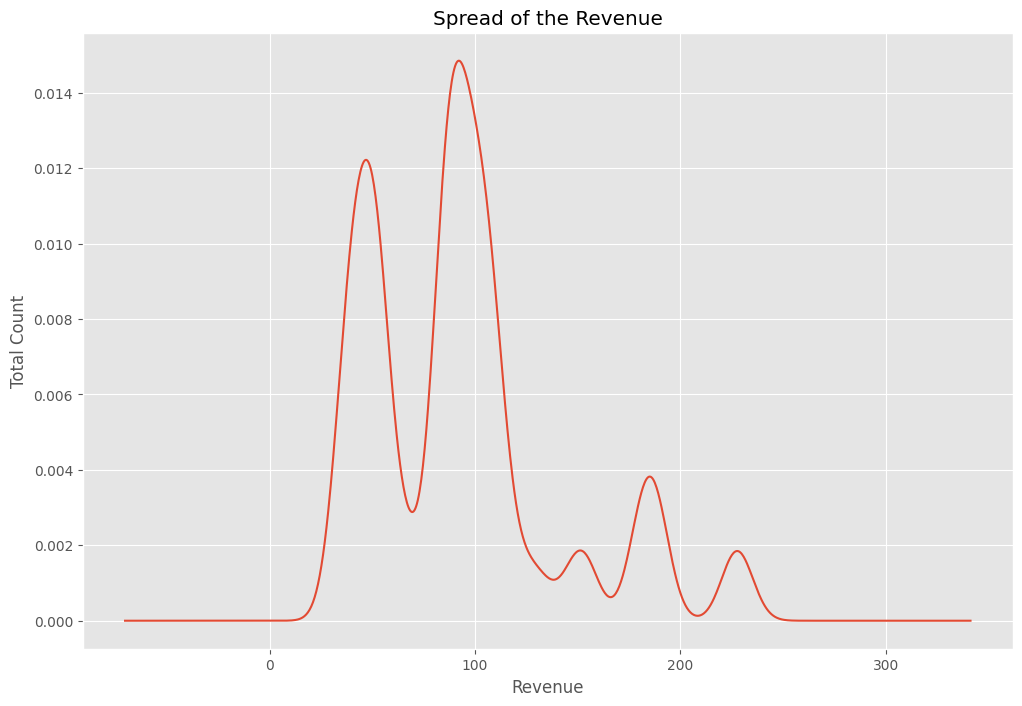

In [8]:
# To plot revenue to see what we should with the null values

df.revenue.plot(kind='kde')
plt.title("Spread of the Revenue")
plt.xlabel("Revenue")
plt.ylabel("Total Count")

**Because the plot of revenue is not normal it looks skwed we can impute the missing value with mode**

In [9]:
# To calculate mode of revenue
from scipy import stats

x = df.revenue.median()
print(x)

# To eplace null values of revenue with median

df_cleaned = df
df_cleaned.revenue = df.revenue.fillna(x)
print(df_cleaned.isnull().any())

89.5
week                 False
sales_method         False
customer_id          False
nb_sold              False
revenue              False
years_as_customer    False
nb_site_visits       False
state                False
dtype: bool


In [10]:
# To clean the sales_method 

df_cleaned.sales_method = df_cleaned.sales_method.replace("email", "Email")
df_cleaned.sales_method = df_cleaned.sales_method.replace ("em + call","Email + Call")
df_cleaned.sales_method.unique()

# To change the type of sale_method

df_cleaned.sales_method = df_cleaned.sales_method.astype('category')
df_cleaned.sales_method

0               Email
1        Email + Call
2                Call
3               Email
4               Email
             ...     
14995            Call
14996            Call
14997            Call
14998            Call
14999    Email + Call
Name: sales_method, Length: 15000, dtype: category
Categories (3, object): ['Call', 'Email', 'Email + Call']

In [11]:
# To find unique values

print(df.state.unique())
print(len(df.state.unique()))
print(df.sales_method.unique())
print(len(df.sales_method.unique()))

['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missouri' 'Texas' 'New York'
 'Maryland' 'California' 'Tennessee' 'Pennsylvania' 'North Dakota'
 'Florida' 'Michigan' 'North Carolina' 'Hawaii' 'Colorado' 'Louisiana'
 'Virginia' 'New Mexico' 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire'
 'Ohio' 'New Jersey' 'Connecticut' 'Iowa' 'Montana' 'Washington'
 'Kentucky' 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota'
 'South Dakota' 'Delaware' 'Maine' 'Utah' 'West Virginia' 'Vermont'
 'Rhode Island' 'Nevada' 'Idaho' 'Wyoming']
50
['Email', 'Email + Call', 'Call']
Categories (3, object): ['Call', 'Email', 'Email + Call']
3


In [12]:
# To see if there is any duplicate

df_cleaned.customer_id.duplicated().any()


False

In [13]:
# Number of customers for each approach

customers_group = df_cleaned.groupby("sales_method")["customer_id"].count()
#print(customers_group)
customers_average = df_cleaned.groupby("sales_method")["revenue"].mean()
print(customers_average)
customers_median = df_cleaned.groupby("sales_method")["revenue"].median()
print(customers_median)
ratio = (182.135 / 94.275)
ratio2= (182.135/49.935)
print(ratio)
print(ratio2)

sales_method
Call             49.125955
Email            96.571903
Email + Call    170.875657
Name: revenue, dtype: float64
sales_method
Call             49.935
Email            94.275
Email + Call    182.135
Name: revenue, dtype: float64
1.9319543887562978
3.647441674176429


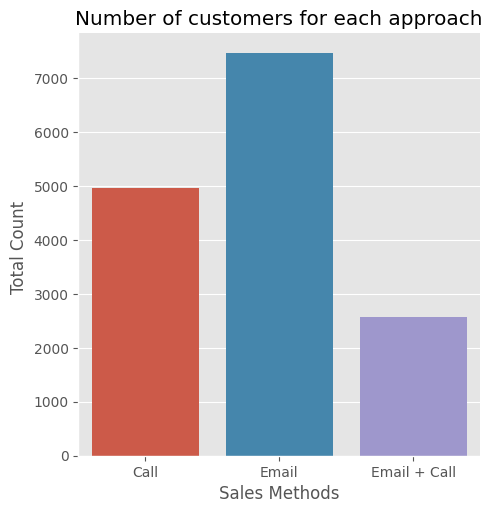

In [14]:
# Plot Number of customers for each approach

sns.catplot(x="sales_method", data= df_cleaned, kind="count")
plt.title("Number of customers for each approach")
plt.xlabel("Sales Methods")
plt.ylabel("Total Count ")

plt.show()

Text(0, 0.5, 'Total Count')

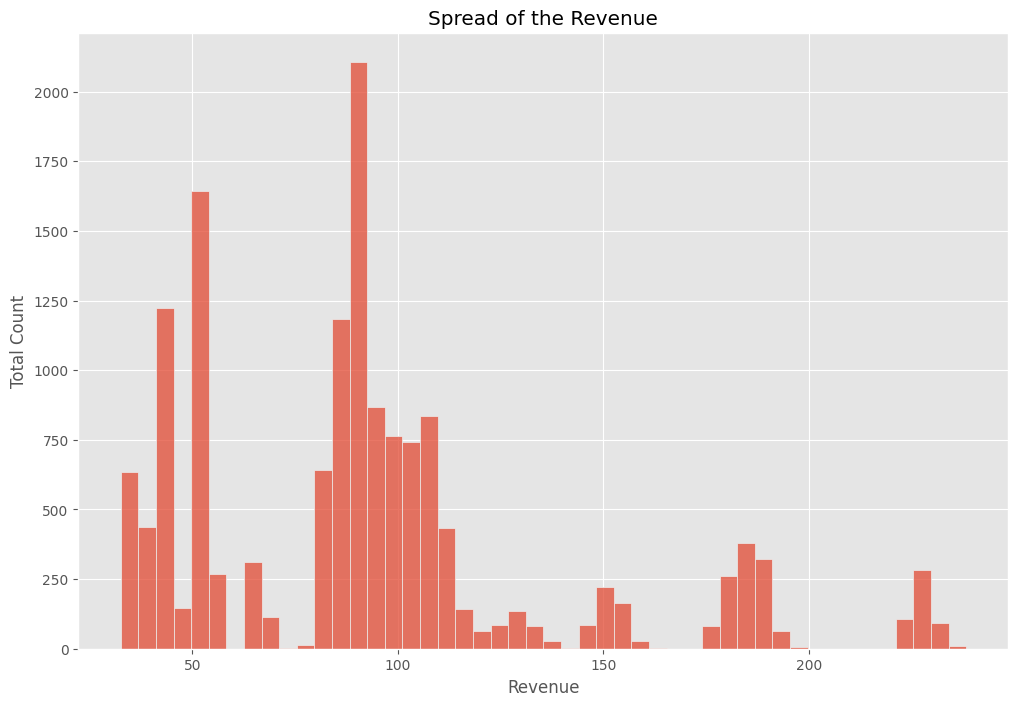

In [15]:
# To demostrate spread of the revenue 

sns.histplot(x='revenue',data=df_cleaned)
plt.title("Spread of the Revenue")
plt.xlabel("Revenue")
plt.ylabel("Total Count")


**In revenue we see two peaks one around 60 the other one around **80.****

Text(0, 0.5, 'Sales method')

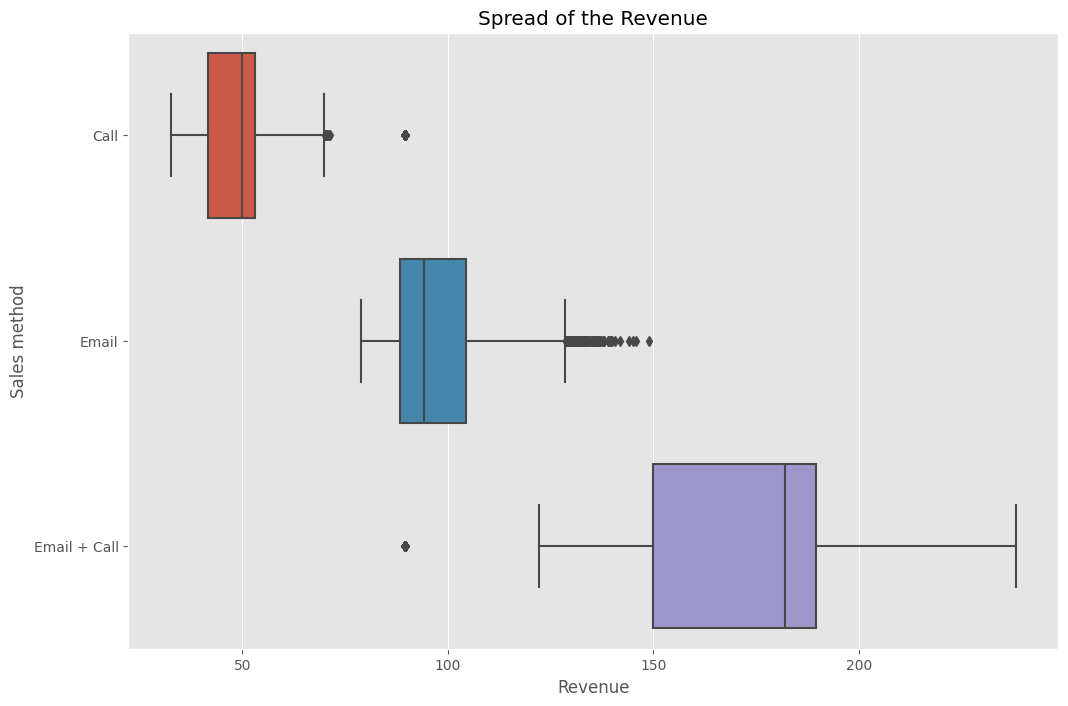

In [16]:
sns.boxplot(data=df_cleaned, x='revenue' , y='sales_method' )
plt.title("Spread of the Revenue")
plt.xlabel("Revenue")
plt.ylabel("Sales method")

**Email + Call would generate less than two times more benefit than Email. Overall it seems the best approach is combination of phone call and Email. However, since sending emails is almost effortless for some products with low revenue value it may worth considering.**   

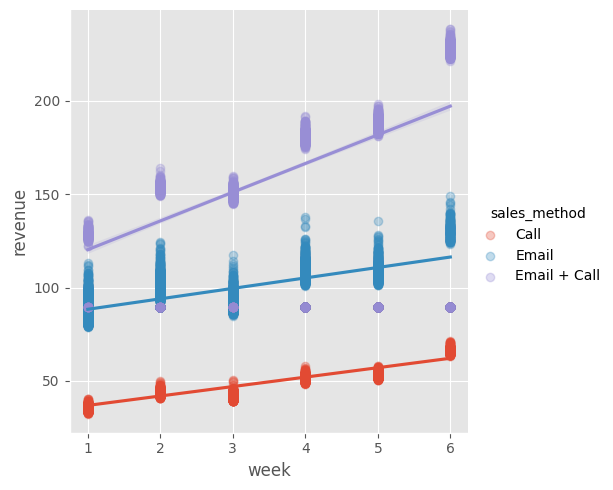

In [17]:
sns.lmplot(x='week',y='revenue', hue= 'sales_method', data= df_cleaned, scatter_kws={'alpha':0.3})

**All three methods have increased over time in term of revenue. However the increased was more significat over Email and calls method.**

**This plor demostrate that customers who have been reached over the phone or by emails, have been more loyal to the company because we can see there is more data after 30 years. so we can say that eventhogh emails and call together are more effitione but over the time it has adverse effect. In addition to that number of customers that have been reached by eamil are x% than other methods. ** 

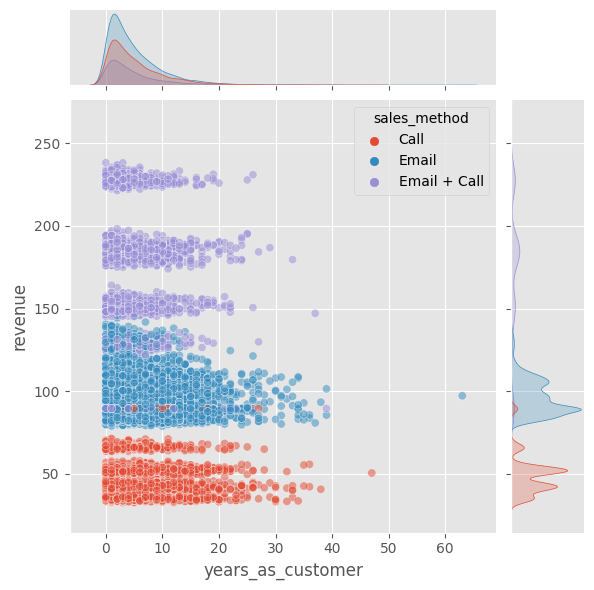

In [18]:
sns.jointplot(y='revenue',x='years_as_customer',hue='sales_method',data=df_cleaned,alpha=0.5,kind='scatter', marginal_kws=dict(rug=True))